In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/train.csv')
dataset.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [11]:
train_df = pd.read_csv('/content/train.csv', index_col=0)
test_df = pd.read_csv('/content/test.csv',index_col=0)

In [12]:
train_df.head()


,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [30]:
train_df.shape

(593994, 12)

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


In [22]:
train_df_numericals = train_df.select_dtypes(include=np.number)
train_df_categoricals = train_df.select_dtypes(exclude=np.number)


In [18]:
train_df_numericals.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [33]:
train_df_categoricals.describe()

,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
count,593994,593994,593994,593994,593994,593994
unique,3,4,5,5,8,30
top,Female,Single,Bachelor's,Employed,Debt consolidation,C3
freq,306175,288843,279606,450645,324695,58695


# Data Preprocessing





1. Data Cleaning

In [29]:
null_values = train_df.isnull().sum()
duplicate_values = train_df.duplicated().sum()
na_values = train_df.isna().sum()

2. Outliers Detection

In [41]:
cols = train_df_numericals.columns.drop('loan_paid_back')

In [49]:
cols.tolist()

['annual_income',
 'debt_to_income_ratio',
 'credit_score',
 'loan_amount',
 'interest_rate']

Lower in annual_income: -21635.979999999996
Upper annual_income: 110551.7
no. of Outliers :  15917


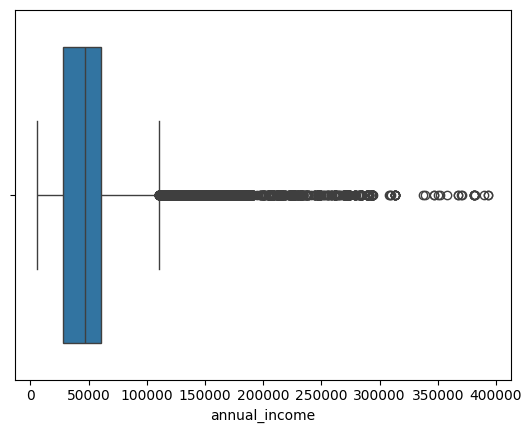

------------------------------------
Lower in debt_to_income_ratio: -0.054000000000000006
Upper debt_to_income_ratio: 0.28200000000000003
no. of Outliers :  17556


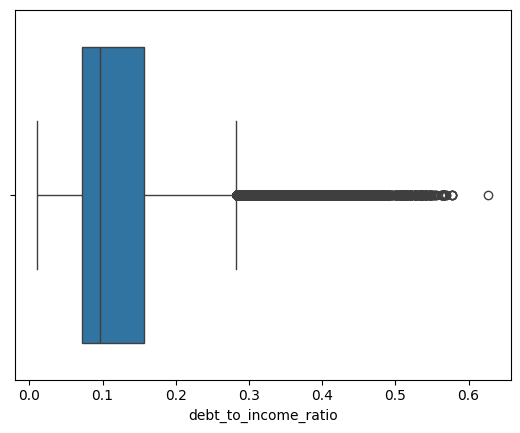

------------------------------------
Lower in loan_amount: -2588.8200000000015
Upper loan_amount: 31727.020000000004
no. of Outliers :  2902


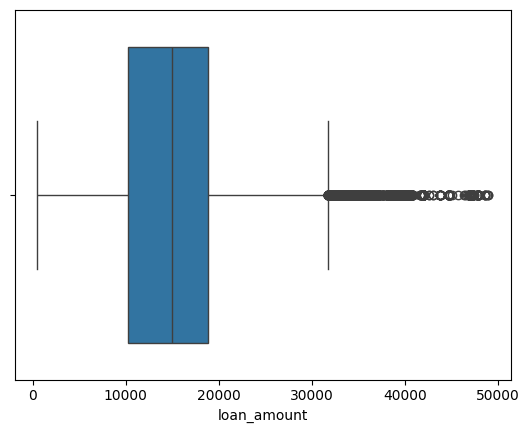

------------------------------------


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['annual_income',
 'debt_to_income_ratio',
 'loan_amount',]:

  Q1 = train_df_numericals[col].quantile(0.25)
  Q3 =  train_df_numericals[col].quantile(0.75)
  iqr = Q3 - Q1
  lower_bound = Q1  - 1.5*iqr
  upper_bound = Q3  + 1.5*iqr
  outliers = train_df_numericals[(train_df_numericals[col] > upper_bound) | (train_df_numericals[col]< lower_bound)]
  print(f"Lower in {col}:", lower_bound)
  print(f"Upper {col}:", upper_bound)
  print("no. of Outliers : ", len(outliers))
  sns.boxplot(x=train_df_numericals[col])
  plt.show()
  print("------------------------------------")

IQR clipping is applied to stabilize feature distributions so that extreme values do not cause overconfident or unstable probability predictions, leading to better calibrated and generalizable probabilities.

 *['annual_income',
 'debt_to_income_ratio',
 'loan_amount']*   These columns are highly skewed

*   annual_income → a few people earn extremely high income
*   loan_amount → some very large loans
*   debt_to_income_ratio → extreme values possible for risky borrowers

That's why we are applying here IQR + Clipping



In [54]:

def iqr_cap(train_df_numericals, col, factor=1.5):
    Q1 = train_df_numericals[col].quantile(0.25)
    Q3 = train_df_numericals[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return train_df_numericals[col].clip(lower, upper)
cols_1 = ['annual_income',
 'debt_to_income_ratio',
 'loan_amount',
 ]
for col in cols_1:
    train_df_numericals[col] = iqr_cap(train_df_numericals, col)
    train_df_numericals[col] = iqr_cap(train_df_numericals, col)

Log Transformation : Log transformation is applied to *annual_income* and *loan_amount* because they are highly skewed financial variables with large ranges, and log scaling reduces skewness, controls outliers, and stabilizes model learning.

In [55]:
for col in ['annual_income', 'loan_amount']:
    train_df_numericals[f'{col}_log'] = np.log1p(train_df_numericals[col])
    train_df_numericals[f'{col}_log'] = np.log1p(train_df_numericals[col])


We clip *'interest_rate'* and *'credit_score'* because they have strict real-world limits, and clipping removes invalid extreme values without losing data.

In [56]:
train_df_numericals['interest_rate'] = train_df_numericals['interest_rate'].clip(0, 40)
train_df_numericals['credit_score'] = train_df_numericals['credit_score'].clip(300, 850)


In [62]:
for col in cols:

  Q1 = train_df_numericals[col].quantile(0.25)
  Q3 =  train_df_numericals[col].quantile(0.75)
  iqr = Q3 - Q1
  lower_bound = Q1  - 1.5*iqr
  upper_bound = Q3  + 1.5*iqr
  outliers = train_df_numericals[(train_df_numericals[col] > upper_bound) | (train_df_numericals[col]< lower_bound)]
  print(f"no. of Outliers {[col]}: ", len(outliers))

  print("------------------------------------")

no. of Outliers ['annual_income']:  0
------------------------------------
no. of Outliers ['debt_to_income_ratio']:  0
------------------------------------
no. of Outliers ['credit_score']:  0
------------------------------------
no. of Outliers ['loan_amount']:  0
------------------------------------
no. of Outliers ['interest_rate']:  0
------------------------------------


Categorical
Encoding

In [67]:
for col in train_df_categoricals.columns:
    print(f"Unique values for '{col}':")
    print(train_df_categoricals[col].unique())
    print("\n")

Unique values for 'gender':
['Female' 'Male' 'Other']


Unique values for 'marital_status':
['Single' 'Married' 'Divorced' 'Widowed']


Unique values for 'education_level':
['High School' "Master's" "Bachelor's" 'PhD' 'Other']


Unique values for 'employment_status':
['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']


Unique values for 'loan_purpose':
['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']


Unique values for 'grade_subgrade':
['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']




In [69]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer

oh_encode = OneHotEncoder(sparse_output=False, drop='first')
ord_encode = OrdinalEncoder()
target_encode = TargetEncoder()

In [79]:
oh_cols = ['gender', 'marital_status']
ord_cols = ['education_level']
target_cols = ['loan_purpose', 'employment_status']

preprocessor = ColumnTransformer(
    transformers = [
        ('one_hot_encode', oh_encode, oh_cols),
        ('ordinal_encode', ord_encode, ord_cols),
        ('target_encoding', target_encode, target_cols)
    ],
    remainder='drop'
)

x_encoded = preprocessor.fit_transform(train_df_categoricals, train_df['loan_paid_back'])

In [83]:
cat_feature_names = preprocessor.get_feature_names_out()

X_cat_encoded_df = pd.DataFrame(
    x_encoded,
    columns=cat_feature_names,
    index=train_df_categoricals.index
)
X_cat_encoded_df.head()

,one_hot_encode__gender_Male,one_hot_encode__gender_Other,one_hot_encode__marital_status_Married,one_hot_encode__marital_status_Single,one_hot_encode__marital_status_Widowed,ordinal_encode__education_level,target_encoding__loan_purpose,target_encoding__employment_status
id,,,,,,,,
0,0.0,0.0,0.0,1.0,0.0,1.0,0.803100,0.899514
1,1.0,0.0,1.0,0.0,0.0,2.0,0.796866,0.894221
2,1.0,0.0,0.0,1.0,0.0,1.0,0.796614,0.893944
3,0.0,0.0,0.0,1.0,0.0,1.0,0.796826,0.894198
4,1.0,0.0,1.0,0.0,0.0,1.0,0.801723,0.894161


In [85]:
X_final = pd.concat(
    [train_df_numericals, X_cat_encoded_df],
    axis=1
)
X_final.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back,annual_income_log,loan_amount_log,one_hot_encode__gender_Male,one_hot_encode__gender_Other,one_hot_encode__marital_status_Married,one_hot_encode__marital_status_Single,one_hot_encode__marital_status_Widowed,ordinal_encode__education_level,target_encoding__loan_purpose,target_encoding__employment_status
id,,,,,,,,,,,,,,,,
0,29367.99,0.084,736.0,2528.42,13.67,1.0,10.287695,7.835745,0.0,0.0,0.0,1.0,0.0,1.0,0.803100,0.899514
1,22108.02,0.166,636.0,4593.10,12.92,0.0,10.003741,8.432528,1.0,0.0,1.0,0.0,0.0,2.0,0.796866,0.894221
2,49566.20,0.097,694.0,17005.15,9.76,1.0,10.811085,9.741330,1.0,0.0,0.0,1.0,0.0,1.0,0.796614,0.893944
3,46858.25,0.065,536.5,4682.48,16.10,1.0,10.754904,8.451797,0.0,0.0,0.0,1.0,0.0,1.0,0.796826,0.894198
4,25496.70,0.053,665.0,12184.43,10.21,1.0,10.146344,9.407996,1.0,0.0,1.0,0.0,0.0,1.0,0.801723,0.894161


In [88]:
X_final.columns

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'loan_paid_back', 'annual_income_log',
       'loan_amount_log', 'one_hot_encode__gender_Male',
       'one_hot_encode__gender_Other',
       'one_hot_encode__marital_status_Married',
       'one_hot_encode__marital_status_Single',
       'one_hot_encode__marital_status_Widowed',
       'ordinal_encode__education_level', 'target_encoding__loan_purpose',
       'target_encoding__employment_status'],
      dtype='object')

In [90]:
X = X_final
y = train_df['loan_paid_back']

# Model **Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=42)
log_reg = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42)

rf = RandomForestRegressor(
    n_estimators=500,        # number of trees
    max_depth=12,           # controls overfitting
    min_samples_split=10,   # minimum samples to split a node
    min_samples_leaf=5,     # minimum samples in a leaf
    max_features='sqrt',    # feature randomness
    bootstrap=True,         # bagging
    n_jobs=-1,              # use all cores
    random_state=42)

gb = GradientBoostingRegressor(
    n_estimators=800,       # boosting stages
    learning_rate=0.05,     # slow & stable learning
    max_depth=4,            # weak learners
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,          # stochastic boosting
    max_features='sqrt',
    loss='squared_error',
    random_state=42)

xgb = XGBClassifier(n_estimators=800,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=3,
    reg_alpha=0.5,
    reg_lambda=1.0,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1 )

lgbm = LGBMClassifier( n_estimators=800,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    objective='binary',
    random_state=42)


log_reg.fit(X_train,y_train)
rf.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
